# Import Requirements

In [83]:
# DataFrame Processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Prep & Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Load Dataset

In [84]:
df = pd.read_csv('https://raw.githubusercontent.com/mari-bangkit/dataset/main/otomotic_id.csv')
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,583645246.4,1.084781e+08,5.582135e+07,412554638.4
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,628435709.3,8.944971e+07,1.240355e+08,526949339.7
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,478367077.1,1.042824e+08,1.491459e+08,501372283.6
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,777042043.6,1.347981e+08,1.281527e+08,787493201.4
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,547636487.2,5.007181e+07,1.308870e+08,653092601.8


In [85]:
df.dtypes

Customer Name           object
Customer e-mail         object
Country                 object
Gender                   int64
Age                      int64
Annual Salary          float64
Credit Card Debt       float64
Net Worth              float64
Car Purchase Amount    float64
dtype: object

In [86]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,0.506000,46.224000,5.756462e+08,8.977384e+07,1.007927e+08,5.163705e+08
std,0.500465,7.990339,1.366955e+08,3.260297e+07,4.053819e+07,1.258307e+08
min,0.000000,20.000000,8.360000e+07,9.344000e+05,4.672000e+06,1.051200e+08
25%,0.000000,41.000000,4.852983e+08,6.912239e+07,7.003893e+07,4.395172e+08
50%,1.000000,46.000000,5.848530e+08,9.021665e+07,9.968883e+07,5.138941e+08
75%,1.000000,52.000000,6.689766e+08,1.102486e+08,1.301910e+08,5.986550e+08
max,1.000000,70.000000,1.018000e+09,1.868800e+08,2.336000e+08,9.344000e+08


In [87]:
df[['Customer Name', 'Customer e-mail', 'Country']].describe().loc[['count', 'unique']]

,Customer Name,Customer e-mail,Country
count,500,500,500
unique,498,500,1


# Identify Missing Values

In [88]:
df.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

# Correlation

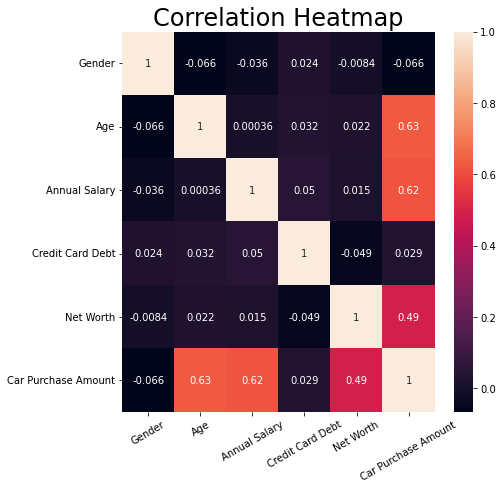

In [89]:
plt.figure(figsize=(7, 7))
plt.title("Correlation Heatmap", fontsize = 24);

sns.heatmap(df.corr(), annot=True, )

plt.xticks(rotation=30)
plt.show()

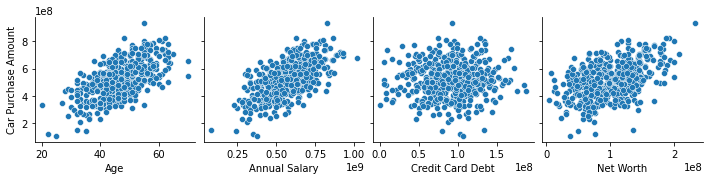

In [90]:
# plt.figure(figsize=(8, 4))

sns.pairplot(
    df,
    x_vars = ['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth'],
    y_vars = 'Car Purchase Amount'
)

plt.show()

# Gender VS ...

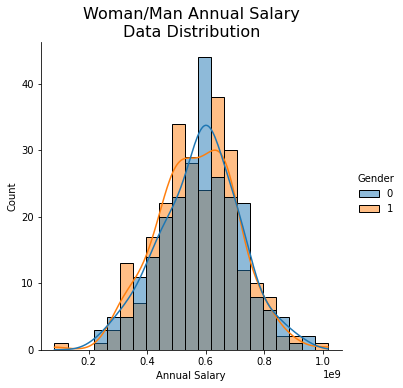

In [91]:
sns.displot(data=df, x='Annual Salary', kde=True, hue='Gender')
plt.title("Woman/Man Annual Salary\nData Distribution", fontsize=16)

plt.show()

580690618.69
570721330.0
9969288.690000057


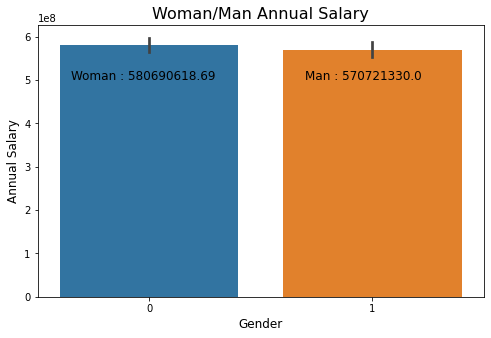

In [92]:
plt.figure(figsize=(8, 5))

woman_annual = round(
    df.loc[
       df['Gender'] == 0, 'Annual Salary'
    ].mean(), 2
)

man_annual = round(
    df.loc[
       df['Gender'] == 1, 'Annual Salary'
    ].mean(), 2
)

sns.barplot(data=df, x='Gender', y='Annual Salary')

plt.title("Woman/Man Annual Salary", fontsize=16)
plt.annotate(f"Woman : {woman_annual}", xy=(-0.35, 5e8), fontsize=12)
plt.annotate(f"Man : {man_annual}", xy=(0.7, 5e8), fontsize=12)

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Annual Salary', fontsize=12)

print(woman_annual)
print(man_annual)
print(abs(woman_annual - man_annual))

plt.show()

524818980.92
508122289.13
16696691.790000021


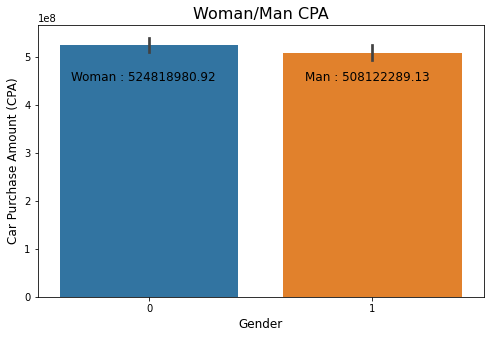

In [93]:
plt.figure(figsize=(8, 5))

woman_cpa = round(
    df.loc[
       df['Gender'] == 0, 'Car Purchase Amount'
    ].mean(), 2
)

man_cpa = round(
    df.loc[
       df['Gender'] == 1, 'Car Purchase Amount'
    ].mean(), 2
)

sns.barplot(data=df, x='Gender', y='Car Purchase Amount')

plt.title("Woman/Man CPA", fontsize=16)
plt.annotate(f"Woman : {woman_cpa}", xy=(-0.35, 4.5e8), fontsize=12)
plt.annotate(f"Man : {man_cpa}", xy=(0.7, 4.5e8), fontsize=12)

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Car Purchase Amount (CPA)', fontsize=12)

print(woman_cpa)
print(man_cpa)
print(abs(woman_cpa - man_cpa))

plt.show()

# Data Distribution

## Age

46.22
46.0


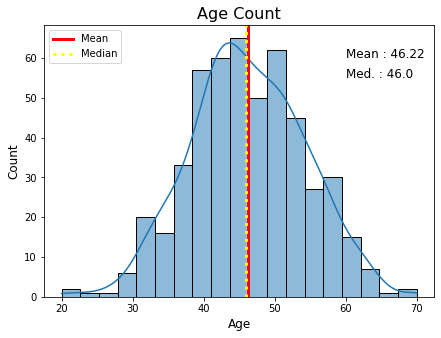

In [94]:
plt.figure(figsize=(7, 5))

mean = round(df['Age'].mean(), 2)
median = round(df['Age'].median(), 2)

sns.histplot(df, x="Age", kde=True)

plt.axvline(mean, color='red', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='yellow', linestyle='dotted', linewidth=3, label='Median')

plt.title("Age Count", fontsize=16)

plt.annotate(f"Mean : {mean}", xy=(60, 60), fontsize=12)
plt.annotate(f"Med. : {median}", xy=(60, 55), fontsize=12)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(loc='upper left')

print(mean)
print(median)

plt.show()

## Annual Salary

575646158.62
584853005.35


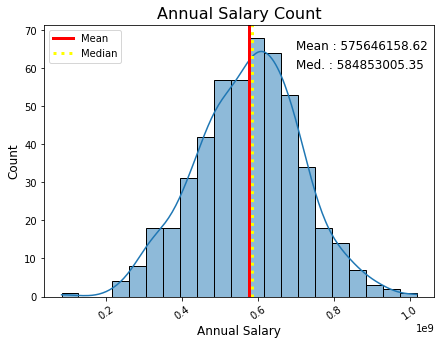

In [95]:
plt.figure(figsize=(7, 5))

mean = round(df['Annual Salary'].mean(), 2)
median = round(df['Annual Salary'].median(), 2)

sns.histplot(df,x="Annual Salary",kde=True)

plt.axvline(mean, color='red', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='yellow', linestyle='dotted', linewidth=3, label='Median')

plt.title("Annual Salary Count", fontsize=16)

plt.annotate(f"Mean : {mean}", xy=(0.7e9, 65), fontsize=12)
plt.annotate(f"Med. : {median}", xy=(0.7e9, 60), fontsize=12)

plt.xlabel('Annual Salary', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=35)
plt.legend(loc='upper left')

print(mean)
print(median)

plt.show()

## Credit Card Debt

89773835.33
90216652.34


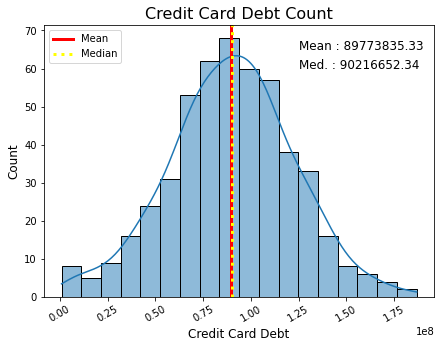

In [96]:
plt.figure(figsize=(7, 5))

mean = round(df['Credit Card Debt'].mean(), 2)
median = round(df['Credit Card Debt'].median(), 2)

sns.histplot(df,x="Credit Card Debt",kde=True)

plt.axvline(mean, color='red', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='yellow', linestyle='dotted', linewidth=3, label='Median')

plt.title("Credit Card Debt Count", fontsize=16)

plt.annotate(f"Mean : {mean}", xy=(1.25e8, 65), fontsize=12)
plt.annotate(f"Med. : {median}", xy=(1.25e8, 60), fontsize=12)

plt.xlabel('Credit Card Debt', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=30)
plt.legend(loc='upper left')

print(mean)
print(median)

plt.show()

## Net Worth

100792726.7
99688828.19


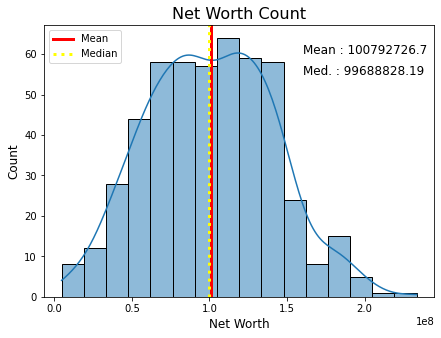

In [97]:
plt.figure(figsize=(7, 5))

mean = round(df['Net Worth'].mean(), 2)
median = round(df['Net Worth'].median(), 2)

sns.histplot(df, x="Net Worth", kde=True)

plt.axvline(mean, color='red', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='yellow', linestyle='dotted', linewidth=3, label='Median')

plt.title("Net Worth Count", fontsize=16)

plt.annotate(f"Mean : {mean}", xy=(1.6e8, 60), fontsize=12)
plt.annotate(f"Med. : {median}", xy=(1.6e8, 55), fontsize=12)

plt.xlabel('Net Worth', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(loc='upper left')

print(mean)
print(median)

plt.show()

## Car Purchase Amount

516370454.87
513894110.0


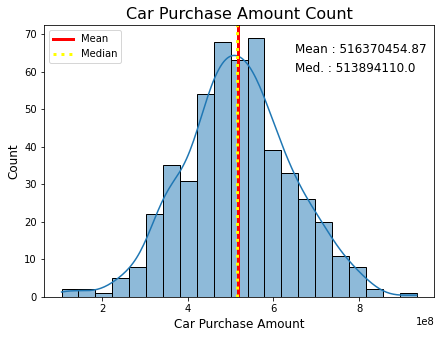

In [98]:
plt.figure(figsize=(7, 5))

mean = round(df['Car Purchase Amount'].mean(), 2)
median = round(df['Car Purchase Amount'].median(), 2)

sns.histplot(df,x="Car Purchase Amount",kde=True)

plt.axvline(mean, color='red', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='yellow', linestyle='dotted', linewidth=3, label='Median')

plt.title("Car Purchase Amount Count", fontsize=16)

plt.annotate(f"Mean : {mean}", xy=(6.5e8, 65), fontsize=12)
plt.annotate(f"Med. : {median}", xy=(6.5e8, 60), fontsize=12)

plt.xlabel('Car Purchase Amount', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(loc='upper left')

print(mean)
print(median)

plt.show()

# Car Purchase Amount (Above & Below AVG)

In [99]:
cpa_mean = df['Car Purchase Amount'].mean()
cpa_mean

516370454.86999977

In [100]:
df_cpa_above = df.loc[df['Car Purchase Amount'] > cpa_mean]
df_cpa_below = df.loc[df['Car Purchase Amount'] <= cpa_mean]

In [101]:
df_cpa_above.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,628435709.3,8.944971e+07,124035504.9,526949339.7
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,777042043.6,1.347981e+08,128152738.6,787493201.4
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,547636487.2,5.007181e+07,130887030.1,653092601.8
5,Carla Hester,mi@Aliquamerat.edu,USA,1,57,650078266.9,1.324930e+08,100094180.2,661228134.8
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,USA,1,50,454466098.4,1.026503e+08,147007377.6,554040597.4


In [102]:
df_cpa_below.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,583645246.4,1.084781e+08,5.582135e+07,412554638.4
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,478367077.1,1.042824e+08,1.491459e+08,501372283.6
6,Griffin Rivera,vehicula@at.co.uk,USA,1,47,315033617.0,5.567585e+07,7.624078e+07,337852240.1
9,Rhonda Chavez,nec@nuncest.com,USA,1,43,474378943.4,1.203888e+08,1.113439e+08,446053430.2
11,Akeem Gibson,turpis.egestas.Fusce@purus.edu,USA,1,53,497324957.6,9.357987e+07,6.864628e+07,493933306.2


In [103]:
df_cpa_above_count = df_cpa_above['Gender'].value_counts()
df_cpa_below_count = df_cpa_below['Gender'].value_counts()

df_cpa_gender = pd.concat((df_cpa_above_count, df_cpa_below_count),
                          keys=('Above CPA Mean', 'Below CPA Mean'), axis=1)

In [104]:
df_cpa_gender

,Above CPA Mean,Below CPA Mean
0,130,117
1,119,134


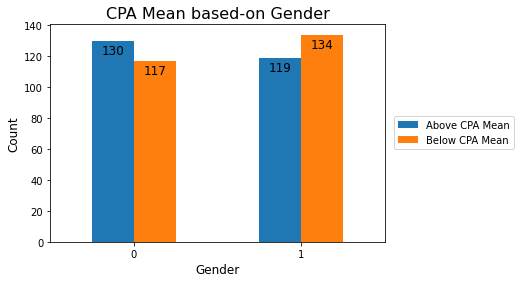

In [105]:
cpa_bar = df_cpa_gender.plot(kind='bar')

for bar in cpa_bar.patches:
    cpa_bar.annotate(format(bar.get_height(), '.0f'),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), 
                     ha='center', va='center',
                     size=15, xytext=(0, -10),
                     fontsize=12,
                     textcoords='offset points')

plt.title('CPA Mean based-on Gender', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation=0)

plt.legend(loc='upper right', bbox_to_anchor=(1.4, 0.6))

plt.show()

# Identify Outlier

## Age

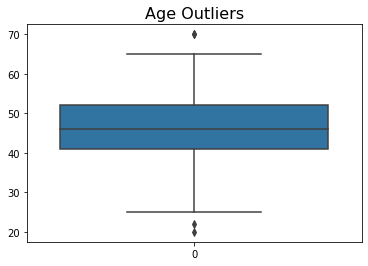

In [106]:
sns.boxplot(data=df['Age'])

plt.title("Age Outliers", fontsize=16)

plt.show()

In [107]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)

lower = q1 - (1.5 * (q3 - q1))
upper = q3 + (1.5 * (q3 - q1))

print(f"Lower Limit\t: {lower}")
print(f"Upper Limit\t: {upper}")

Lower Limit	: 24.5
Upper Limit	: 68.5


In [108]:
df.loc[df['Age'] < lower]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
37,Uriel Bradshaw,ultrices@Integersemelit.com,USA,1,22,353779238.4,102009764.9,7.632710e+07,117877189.1
444,Camden,Aliquam.adipiscing.lobortis@loremut.net,USA,1,20,673058004.7,934400.0,1.155401e+08,334578204.8


In [109]:
df.loc[df['Age'] > upper]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
194,Gil Sanders,eu.ultrices@cursuset.net,USA,0,70,461135499.3,1.162287e+08,80955288.09,656759540.3
236,Tate C. Foster,dignissim.magna@Maurisvel.edu,USA,1,70,333955106.9,6.363783e+07,58918660.61,549071864.1


## Annual Salary

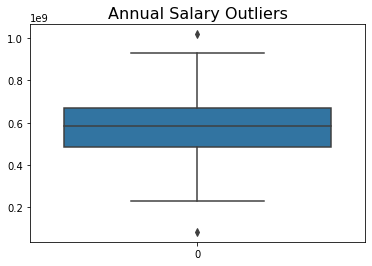

In [110]:
sns.boxplot(data=df['Annual Salary'])

plt.title("Annual Salary Outliers", fontsize=16)

plt.show()

In [111]:
q1 = df['Annual Salary'].quantile(0.25)
q3 = df['Annual Salary'].quantile(0.75)

lower = q1 - (1.5 * (q3 - q1))
upper = q3 + (1.5 * (q3 - q1))

print(f"Lower Limit\t: {lower}")
print(f"Upper Limit\t: {upper}")

Lower Limit	: 209780791.75000006
Upper Limit	: 944494130.15


In [112]:
df.loc[df['Annual Salary'] < lower]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
89,Ferdinand Weber,metus.Vivamus@vitaeposuere.org,USA,1,32,83600000.0,133262331.4,135296834.7,150621947.5


In [113]:
df.loc[df['Annual Salary'] > upper]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
28,Gemma Hendrix,lobortis@non.co.uk,USA,1,46,1.018000e+09,163080101.2,43924293.37,681531715.3


## Credit Card Debt

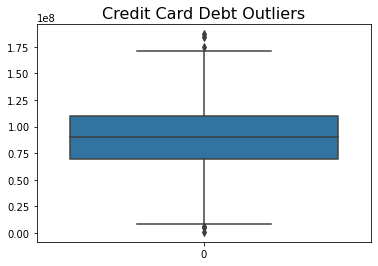

In [114]:
sns.boxplot(data=df['Credit Card Debt'])

plt.title("Credit Card Debt Outliers", fontsize=16)

plt.show()

In [115]:
q1 = df['Credit Card Debt'].quantile(0.25)
q3 = df['Credit Card Debt'].quantile(0.75)

lower = q1 - (1.5 * (q3 - q1))
upper = q3 + (1.5 * (q3 - q1))

print(f"Lower Limit\t: {lower}")
print(f"Upper Limit\t: {upper}")

Lower Limit	: 7433042.237499997
Upper Limit	: 171937963.09750003


In [116]:
df.loc[df['Credit Card Debt'] < lower]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
239,Zane I. Boone,blandit@Cum.edu,USA,1,45,585129021.0,5905901.853,106425776.6,519000615.3
290,Abigail X. Lindsey,dui@nondui.ca,USA,0,63,393694227.2,5980584.012,146271871.2,648746736.4
444,Camden,Aliquam.adipiscing.lobortis@loremut.net,USA,1,20,673058004.7,934400.000,115540109.6,334578204.8
488,Neville,felis.Nulla@mi.ca,USA,0,42,569207098.3,5557857.444,116145280.9,490380409.7


In [117]:
df.loc[df['Credit Card Debt'] > upper]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
221,Laurel H. Snow,dui.Suspendisse.ac@tacitisociosqu.org,USA,1,36,661698070.7,186880000.0,7.844513e+07,435705662.7
253,Shaeleigh M. Mckenzie,diam.lorem.auctor@estmollisnon.net,USA,1,46,497469592.6,174668761.1,7.402939e+07,433256989.5
440,Ora,bibendum.Donec.felis@liberoestcongue.org,USA,1,40,524837177.2,184010575.5,1.404427e+08,480602412.1


## Net Worth

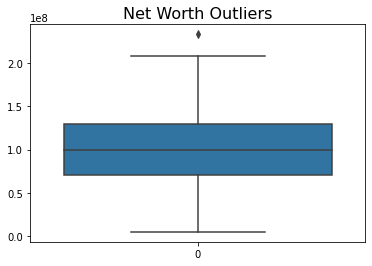

In [118]:
sns.boxplot(data=df['Net Worth'])

plt.title("Net Worth Outliers", fontsize=16)

plt.show()

In [119]:
q1 = df['Net Worth'].quantile(0.25)
q3 = df['Net Worth'].quantile(0.75)

lower = q1 - (1.5 * (q3 - q1))
upper = q3 + (1.5 * (q3 - q1))

print(f"Lower Limit\t: {lower}")
print(f"Upper Limit\t: {upper}")

Lower Limit	: -20189166.943750024
Upper Limit	: 220419097.32625002


In [120]:
df.loc[df['Net Worth'] > upper]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
315,"Cameron, Kimberley P.",nec.tellus@lacinia.co.uk,USA,1,55,823338907.1,92263359.86,233600000.0,934400000.0


## Car Purchase Amount

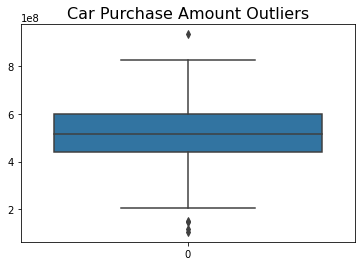

In [121]:
sns.boxplot(data=df['Car Purchase Amount'])

plt.title("Car Purchase Amount Outliers", fontsize=16)

plt.show()

In [122]:
q1 = df['Car Purchase Amount'].quantile(0.25)
q3 = df['Car Purchase Amount'].quantile(0.75)

lower = q1 - (1.5 * (q3 - q1))
upper = q3 + (1.5 * (q3 - q1))

print(f"Lower Limit\t: {lower}")
print(f"Upper Limit\t: {upper}")

Lower Limit	: 200810453.675
Upper Limit	: 837361739.2749999


In [123]:
df.loc[df['Car Purchase Amount'] < lower]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
37,Uriel Bradshaw,ultrices@Integersemelit.com,USA,1,22,353779238.4,1.020098e+08,7.632710e+07,117877189.1
89,Ferdinand Weber,metus.Vivamus@vitaeposuere.org,USA,1,32,83600000.0,1.332623e+08,1.352968e+08,150621947.5
270,Urielle M. Contreras,elit.Aliquam.auctor@dolor.org,USA,0,35,240380603.0,8.008379e+07,4.932899e+07,146431440.7
453,Tatyana,sem@parturientmontesnascetur.net,USA,0,25,376683211.7,1.063356e+08,3.708595e+07,105120000.0


In [124]:
df.loc[df['Car Purchase Amount'] > upper]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
315,"Cameron, Kimberley P.",nec.tellus@lacinia.co.uk,USA,1,55,823338907.1,92263359.86,233600000.0,934400000.0


# Drop Non-predictable Features

In [125]:
df = df.drop(['Customer Name', 'Customer e-mail', 'Country'], axis=1)

In [126]:
df.tail()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
495,0,41,690287266.0,6.536971e+07,1.265341e+08,571168859.1
496,1,38,504541335.8,1.149448e+08,8.419390e+07,367819722.2
497,1,54,654620927.6,9.915485e+07,1.785945e+08,749240334.1
498,1,59,431804050.4,1.309378e+08,7.891630e+07,530764353.2
499,1,47,566809515.1,8.775270e+07,1.081443e+08,526852395.7


In [127]:
df.columns

Index(['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

# Train-Test Split

In [128]:
X = df.drop(['Car Purchase Amount'], axis=1)
y = df['Car Purchase Amount']

In [129]:
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,42,583645246.4,1.084781e+08,5.582135e+07
1,0,41,628435709.3,8.944971e+07,1.240355e+08
2,1,43,478367077.1,1.042824e+08,1.491459e+08
3,1,58,777042043.6,1.347981e+08,1.281527e+08
4,1,57,547636487.2,5.007181e+07,1.308870e+08


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Prepare Model Comparison

In [131]:
cols = ['Model', 'MAE', 'MSE', 'R^2']
final_result = pd.DataFrame(columns=cols)

final_result

,Model,MAE,MSE,R^2


In [132]:
# EVALUATION Method

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_reg(y_true:pd.DataFrame, y_pred:pd.DataFrame):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {'MAE': mae, 'MSE': mse, 'R2': r2}

# Modelling

## Linear Regression

In [133]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

print(linear_reg.coef_)
print(linear_reg.intercept_)

[2.39317863e+05 9.81455600e+06 5.62066026e-01 6.34678593e-03
 1.44624582e+00]
-407315231.2078985


In [134]:
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

In [135]:
result = ['Linear Reg.'] + list(eval_reg(y_test, y_test_pred).values())

final_result = pd.concat([final_result, pd.DataFrame([result], columns=cols)])

In [136]:
# Evaluation

print(f"Train\t: {eval_reg(y_train, y_train_pred)['MAE']}")
print(f"Test\t: {eval_reg(y_test, y_test_pred)['MAE']}")

Train	: 2450168.8413319294
Test	: 2284865.230327868


## Elastic-net

In [137]:
elastic_net = ElasticNet().fit(X_train, y_train)

In [138]:
y_train_pred = elastic_net.predict(X_train)
y_test_pred = elastic_net.predict(X_test)

In [139]:
print(f"Train\t: {eval_reg(y_train, y_train_pred)['MAE']}")
print(f"Test\t: {eval_reg(y_test, y_test_pred)['MAE']}")

Train	: 2494531.45915991
Test	: 2332398.6587646524


In [140]:
result = ['Elastic Net'] + list(eval_reg(y_test, y_test_pred).values())

final_result = pd.concat([final_result, pd.DataFrame([result], columns=cols)])

## Lasso

In [141]:
lasso = Lasso()

lasso.fit(X_train, y_train)

Lasso()

In [142]:
print(lasso.coef_)
print(lasso.intercept_)
print(lasso.alpha)

[2.39313846e+05 9.81455597e+06 5.62066023e-01 6.34679265e-03
 1.44624582e+00]
-407315227.0523963
1.0


In [143]:
X_test.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
304,1,35,399592383.9,6.760078e+07,6.441812e+07
340,1,39,335740743.0,5.042986e+07,7.542752e+07
47,0,51,521347469.3,2.083802e+07,3.713766e+07
67,1,43,541407282.6,8.067962e+07,1.338655e+08
479,0,58,567513310.9,1.080267e+08,9.855394e+07


In [144]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [145]:
print(f"Train\t: {eval_reg(y_train, y_train_pred)['MAE']}")
print(f"Test\t: {eval_reg(y_test, y_test_pred)['MAE']}")

Train	: 2450168.8481330588
Test	: 2284865.2860224755


In [146]:
result = ['Lasso'] + list(eval_reg(y_test, y_test_pred).values())

final_result = pd.concat([final_result, pd.DataFrame([result], columns=cols)])

## Ridge

In [147]:
ridge = Ridge().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.40488e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [148]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [149]:
print(f"Train\t: {eval_reg(y_train, y_train_pred)['MAE']}")
print(f"Test\t: {eval_reg(y_test, y_test_pred)['MAE']}")

Train	: 2450218.0651354664
Test	: 2284994.663302303


In [150]:
result = ['Ridge'] + list(eval_reg(y_test, y_test_pred).values())

final_result = pd.concat([final_result, pd.DataFrame([result], columns=cols)])

## SVR

In [151]:
svr = SVR().fit(X_train, y_train)

In [152]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [153]:
result = ['SVR'] + list(eval_reg(y_test, y_test_pred).values())

final_result = pd.concat([final_result, pd.DataFrame([result], columns=cols)])

## Random Forest

In [154]:
rfr = RandomForestRegressor(max_depth=8)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=8)

In [155]:
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

In [156]:
result = ['Random Forest'] + list(eval_reg(y_test, y_test_pred).values())

final_result = pd.concat([final_result, pd.DataFrame([result], columns=cols)])

# Compare Model Performances

In [157]:
final_result = final_result.reset_index(drop=True)
final_result

,Model,MAE,MSE,R^2
0,Linear Reg.,2.284865e+06,7.087911e+12,0.999580
1,Elastic Net,2.332399e+06,7.233153e+12,0.999572
2,Lasso,2.284865e+06,7.087911e+12,0.999580
3,Ridge,2.284995e+06,7.087017e+12,0.999580
4,SVR,1.029361e+08,1.689002e+16,-0.000526
5,Random Forest,2.476408e+07,1.279352e+15,0.924214


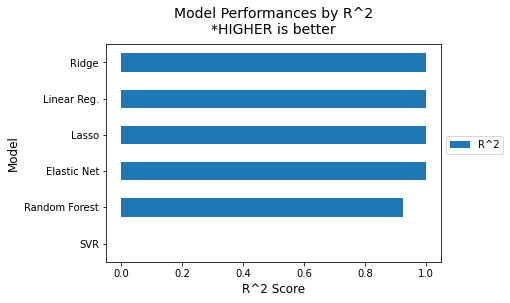

In [158]:
final_result.set_index(['Model']).sort_values('R^2')['R^2'].plot(kind='barh')

plt.title("Model Performances by R^2\n*HIGHER is better", fontsize=14, pad=10)
plt.xticks()
plt.xlabel('R^2 Score', fontsize=12)
plt.ylabel('Model', fontsize=12)

plt.legend(loc='best', bbox_to_anchor=(1, 0.6))

plt.show()

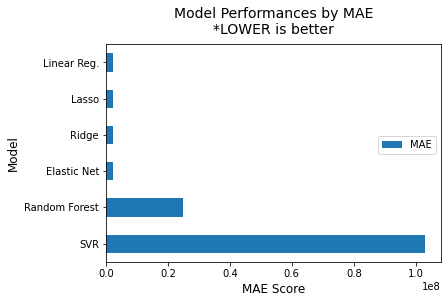

In [159]:
final_result.set_index(['Model']).sort_values('MAE', ascending=False)['MAE'].plot(kind='barh')

plt.title("Model Performances by MAE\n*LOWER is better", fontsize=14, pad=10)
plt.xticks()
plt.xlabel('MAE Score', fontsize=12)
plt.ylabel('Model', fontsize=12)

plt.legend(loc='best', bbox_to_anchor=(1, 0.6))

plt.show()

**CONCLUSION:** Linear Regression & Lasso regression performs the best performance.

# Export Model

In [160]:
from os import path, makedirs
import joblib

dirname = './models'

if not(path.exists(dirname)):
    makedirs(dirname)

pkl_filename = path.join(dirname, 'model1.pkl')

with open(pkl_filename, 'wb') as f:
    joblib.dump(lasso, f)

# Consume Exported Model

In [161]:
model = joblib.load(open(pkl_filename, 'rb'))

In [162]:
model.score(X_test, y_test)

0.9995801281684735

In [163]:
X_test.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
304,1,35,399592383.9,6.760078e+07,6.441812e+07
340,1,39,335740743.0,5.042986e+07,7.542752e+07
47,0,51,521347469.3,2.083802e+07,3.713766e+07
67,1,43,541407282.6,8.067962e+07,1.338655e+08
479,0,58,567513310.9,1.080267e+08,9.855394e+07


In [164]:
model.predict([[0, 35, 300_000_000, 10_000_000, 400_000_000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


array([6.83375835e+08])